<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/btc_period_and_predictions_find.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
from my_func_pkg import find_best_period_for_dependency,blind_boundary_exp_smooth_curve,most_frequency_cenarios
import yfinance as yf
import numpy as np

In [3]:
btc=yf.download('BTC-USD',interval='1D')

[*********************100%***********************]  1 of 1 completed


In [4]:
fbpdun=find_best_period_for_dependency(btc.Close.values,overlay=False)

100%|██████████| 1869/1869 [05:24<00:00,  5.76it/s] 


Enter your number of points :100
Enter your number of try fit :500


100%|██████████| 500/500 [00:00<00:00, 1270.73it/s]


In [5]:
pd.DataFrame(fbpdun[0]).to_csv('fbpdun.csv')

In [6]:
from my_func_pkg import intersect,fix_num_key_index
import matplotlib.pyplot as plt

In [39]:
fnki=fix_num_key_index(fbpdun[0],point_num=50,max_iter=1000)

100%|██████████| 1000/1000 [00:00<00:00, 1303.04it/s]


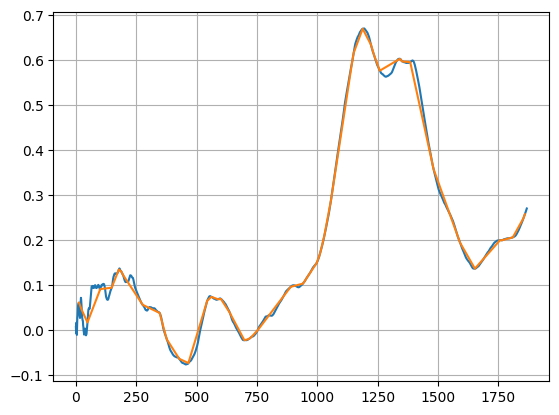

In [40]:
plt.plot(fbpdun[0])
plt.plot(fnki,fbpdun[0][fnki])
plt.grid()
plt.show()

In [10]:
fbpdov=find_best_period_for_dependency(btc.Close.values,overlay=True)

100%|██████████| 3742/3742 [11:31<00:00,  5.41it/s] 


In [11]:
pd.DataFrame(fbpdov[0]).to_csv('fbpdov.csv')

In [12]:
len(fbpdov[0])

3742

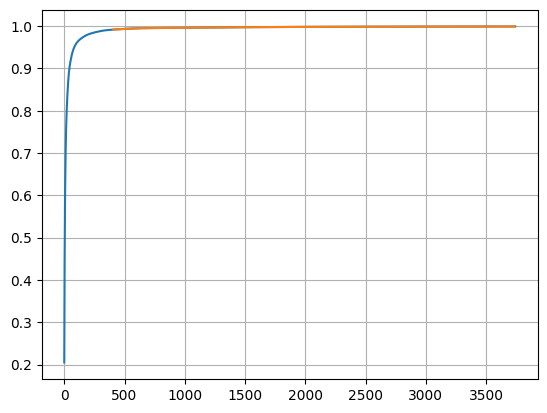

In [28]:
plt.plot(fbpdov[0])
plt.plot(fbpdov[1],fbpdov[0][fbpdov[1]])
plt.grid()
plt.show()

In [41]:
section=intersect(fbpdov[1],fnki)

In [42]:
section

array([ 639, 1057, 1757])

In [44]:
fnki

array([  13,   24,   48,  101,  148,  178,  188,  196,  277,  347,  373,
        377,  428,  466,  544,  561,  589,  601,  638,  639,  698,  715,
        727,  753,  890,  941,  950,  997,  998, 1010, 1014, 1029, 1057,
       1144, 1151, 1188, 1222, 1236, 1259, 1342, 1352, 1385, 1482, 1592,
       1653, 1757, 1764, 1810, 1854, 1860])

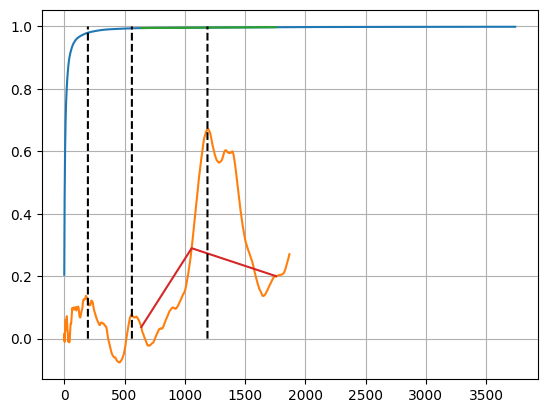

In [54]:
plt.plot(fbpdov[0])
plt.plot(fbpdun[0])
plt.plot(section,fbpdov[0][section])
plt.plot(section,fbpdun[0][section])
plt.plot([196]*(len(fbpdov[0])+len(fbpdun[0])),np.linspace(0,1,len(fbpdov[0])+len(fbpdun[0])),linestyle='--',c='black')
plt.plot([561]*(len(fbpdov[0])+len(fbpdun[0])),np.linspace(0,1,len(fbpdov[0])+len(fbpdun[0])),linestyle='--',c='black')
plt.plot([1188]*(len(fbpdov[0])+len(fbpdun[0])),np.linspace(0,1,len(fbpdov[0])+len(fbpdun[0])),linestyle='--',c='black')
plt.grid()
plt.show()